In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('RmVisualisation.csv', index_col = 'Price')

In [3]:
#this csv has already been cleaned.

In [4]:
df.head(2)

,number_bedrooms,Latitude,Longitude
Price,,,
1660000.0,2.0,51.517496,-0.100046
550000.0,1.0,51.511134,-0.077605


In [5]:
#we wish to standardise the data again

In [6]:
scaler = StandardScaler ()

In [7]:
df[['number_bedrooms_T', 'Latitude_T', 'Longitude_T']] = scaler.fit_transform(df[['number_bedrooms', 'Latitude', 'Longitude']])

In [8]:
df

,number_bedrooms,Latitude,Longitude,number_bedrooms_T,Latitude_T,Longitude_T
Price,,,,,,
1660000.0,2.0,51.517496,-0.100046,-0.341702,0.179463,0.166664
550000.0,1.0,51.511134,-0.077605,-1.123406,0.092365,0.315431
450000.0,0.0,51.520525,-0.096939,-1.905110,0.220937,0.187263
780000.0,2.0,51.518252,-0.097164,-0.341702,0.189816,0.185771
1790000.0,2.0,51.508495,-0.080767,-0.341702,0.056227,0.294470
...,...,...,...,...,...,...
17250000.0,6.0,51.529296,-0.176073,2.785113,0.341022,-0.337330
750000.0,1.0,51.515237,-0.193353,-1.123406,0.148531,-0.451879
1699995.0,2.0,51.514494,-0.199157,-0.341702,0.138362,-0.490352


In [9]:
#create function to identify optimum no. of clusters

In [10]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #generate elbow plot
    fig =plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [11]:
#Let's start with a 3D cluster. Using all our data

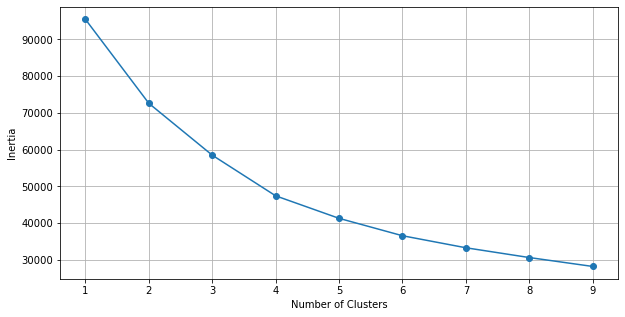

In [12]:
optimise_k_means(df[['number_bedrooms_T', 'Longitude_T', 'Latitude_T']], 10)

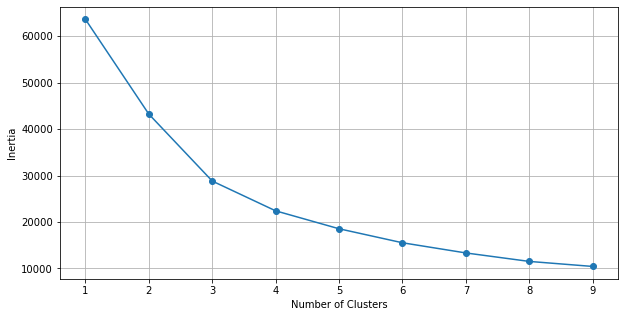

In [13]:
optimise_k_means(df[['number_bedrooms_T', 'Longitude_T']], 10)

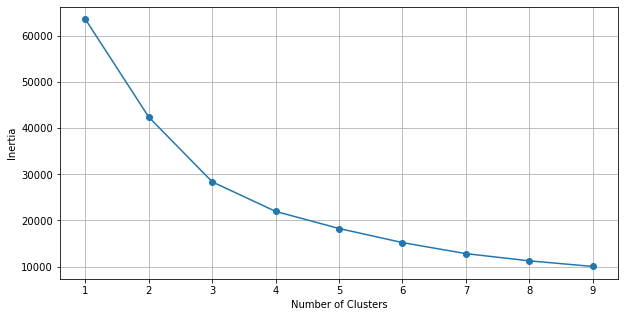

In [14]:
optimise_k_means(df[['number_bedrooms_T', 'Latitude_T']], 10)

In [15]:
#looking at the moments of inertiaa, it appears 4 clusters is best for our 3d plot and 3 clusters for our 2d plots.

In [16]:
kmeans = KMeans(n_clusters=4)

In [17]:
kmeans.fit(df[['number_bedrooms_T', 'Longitude_T', 'Latitude_T']]) 

KMeans(n_clusters=4)

In [18]:
df['3dkmeans'] = kmeans.labels_

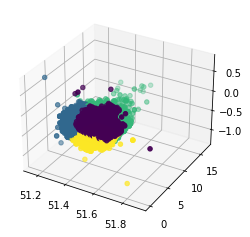

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Latitude'], df['number_bedrooms'], df['Longitude'], c=df['3dkmeans'])


In [20]:
#this is hard to interpret, maybe using 2d clusters could reveal patterns in our data.

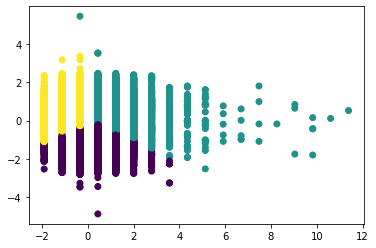

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['number_bedrooms_T', 'Latitude_T']]) 
df['2dkmeans_1'] = kmeans.labels_
plt.scatter(x=df['number_bedrooms_T'], y=df['Latitude_T'], c=df['2dkmeans_1'])
plt.savefig('latitudecluster.png')

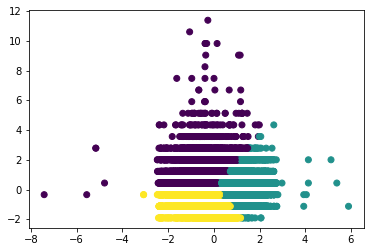

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['number_bedrooms_T', 'Longitude_T']]) 
df['2dkmeans_2'] = kmeans.labels_
plt.scatter(x=df['Longitude_T'], y=df['number_bedrooms_T'], c=df['2dkmeans_2'])
plt.savefig('longitudecluster.png')

In [23]:
df

,number_bedrooms,Latitude,Longitude,number_bedrooms_T,Latitude_T,Longitude_T,3dkmeans,2dkmeans_1,2dkmeans_2
Price,,,,,,,,,
1660000.0,2.0,51.517496,-0.100046,-0.341702,0.179463,0.166664,1,0,2
550000.0,1.0,51.511134,-0.077605,-1.123406,0.092365,0.315431,1,0,2
450000.0,0.0,51.520525,-0.096939,-1.905110,0.220937,0.187263,0,0,2
780000.0,2.0,51.518252,-0.097164,-0.341702,0.189816,0.185771,1,0,2
1790000.0,2.0,51.508495,-0.080767,-0.341702,0.056227,0.294470,1,0,2
...,...,...,...,...,...,...,...,...,...
17250000.0,6.0,51.529296,-0.176073,2.785113,0.341022,-0.337330,2,2,0
750000.0,1.0,51.515237,-0.193353,-1.123406,0.148531,-0.451879,0,0,2
1699995.0,2.0,51.514494,-0.199157,-0.341702,0.138362,-0.490352,0,0,2
